In [103]:
import numpy as np
import pandas as pd

In [104]:
df = pd.read_csv('torg.csv', sep=';')
df.head(5)

,IE_XML_ID,IE_NAME,IP_PROP30,IP_PROP31,IP_PROP32,CP_QUANTITY,CR_PRICE_1_USD
0,179,Штаны Полосатый Рейс,purple,NaN,L,99,29.06
1,181,Штаны Полосатый Рейс,purple,NaN,XL,100,29.06
2,182,Штаны Полосатый Рейс,purple,NaN,XS,100,29.06
3,183,Штаны Полосатый Рейс,purple,NaN,M,100,29.06
4,184,Штаны Полосатый Рейс,purple,NaN,S,100,29.06


In [105]:
df.groupby('IP_PROP30')['IP_PROP30'].count().sort_values(ascending=False)

IP_PROP30
black        50
white        50
brown        35
purple       25
red          25
blue         20
pink         20
green        15
see          10
azure         5
flowers       5
orangered     5
jeans         5
redblue       5
Name: IP_PROP30, dtype: int64

IP_PROP32
M     4198
S     4198
XS    4299
L     4397
XL    4399
Name: CP_QUANTITY, dtype: int64


<Axes: title={'center': 'Остаток размера на складе'}, xlabel='Количество', ylabel='Размер'>

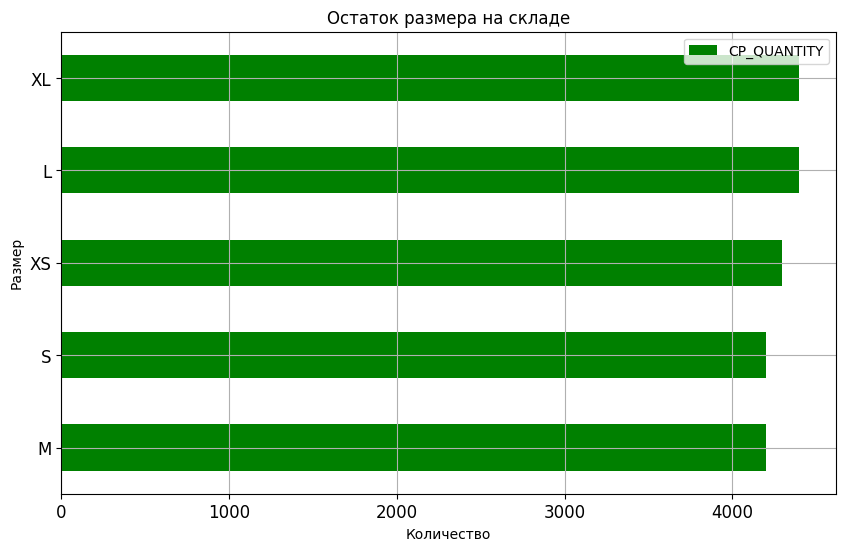

In [106]:
re = df.groupby(['IP_PROP32'])['CP_QUANTITY'].sum().sort_values(ascending=True)
print(re)
re.plot(kind='barh', title='Остаток размера на складе', color='green', figsize=(10, 6), grid=True, legend=True, fontsize=12, ylabel='Размер', xlabel='Количество')

In [107]:
df = pd.read_csv('dataset_345422_8.txt', sep=';')
df['TOTAL_PRICE'] = df['CP_QUANTITY'] * df['CR_PRICE_1_USD']
df[(df['IP_PROP30'] == 'pink') & (df['IP_PROP32'] == 'XL')].groupby(['IP_PROP30', 'IP_PROP32'])['TOTAL_PRICE'].sum()

IP_PROP30  IP_PROP32
pink       XL           1743.0
Name: TOTAL_PRICE, dtype: float64

In [108]:
df  = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [109]:
re = df[['gender', 'race/ethnicity', 'reading score']]
re.groupby(['gender', 'race/ethnicity'])['reading score'].median()

gender  race/ethnicity
female  group A           67.5
        group B           71.5
        group C           73.0
        group D           74.0
        group E           76.0
male    group A           61.0
        group B           62.0
        group C           66.0
        group D           68.0
        group E           73.0
Name: reading score, dtype: float64

In [110]:
re = df.groupby(['gender', 'parental level of education'])[['math score', 'reading score', 'writing score']].mean()
re['Total_mean'] = (re['math score'] + re['reading score'] + re['writing score']) / 3
re[re['Total_mean'] == re['Total_mean'].max()]
# "bachelor's degree"

,,math score,reading score,writing score,Total_mean
gender,parental level of education,,,,
female,bachelor's degree,68.349206,77.285714,78.380952,74.671958


In [111]:
re2 = df.groupby(['gender', 'parental level of education'])[['math score', 'reading score', 'writing score']].mean()
re2['Total_mean'] = (re2['math score'] + re2['reading score'] + re2['writing score']) / 3
re2


math score  reading score  writing score  \
gender parental level of education                                             
female associate's degree            65.250000      74.120690      74.000000   
       bachelor's degree             68.349206      77.285714      78.380952   
       high school                   59.351064      68.202128      66.691489   
       master's degree               66.500000      76.805556      77.638889   
       some college                  65.406780      73.550847      74.050847   
       some high school              59.296703      69.109890      68.285714   
male   associate's degree            70.764151      67.433962      65.405660   
       bachelor's degree             70.581818      68.090909      67.654545   
       high school                   64.705882      61.480392      58.539216   
       master's degree               74.826087      73.130435      72.608696   
       some college                  69.009259      64.990741      63.148148   
       some high school              67.840909      64.693182      61.375000   

                                    Total_mean  
gender parental level of education              
female associate's degree            71.123563  
       bachelor's degree             74.671958  
       high school                   64.748227  
       master's degree               73.648148  
       some college                  71.002825  
       some high school              65.564103  
male   associate's degree            67.867925  
       bachelor's degree             68.775758  
       high school                   61.575163  
       master's degree               73.521739  
       some college                  65.716049  
       some high school              64.636364

In [128]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
def dayOfWeek(x):
    return days[x]

df = pd.read_csv('dataset_345422_14.txt')

df['Date'] = pd.to_datetime(df['Date']).dt.day_of_week
df['week_day'] = df['Date'].map(dayOfWeek)
col = df.columns[1:-1]
r = df.groupby('week_day')[col].mean()
r['sum_visits'] = r.sum(axis=1)
r['sum_visits'].idxmax()

'Thursday'

In [114]:
df = pd.read_csv('football_players.csv')
df

,Unnamed: 0,Name,Age,Nationality,Club,Value,Wage,Position,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,L. Messi,31,Argentina,FC Barcelona,110500000,565000,RF,84,95,...,75,96,33,28,26,6,11,15,14,8
1,1,Cristiano Ronaldo,33,Portugal,Juventus,77000000,405000,ST,84,94,...,85,95,28,31,23,7,11,15,14,11
2,2,Neymar Jr,26,Brazil,Paris Saint-Germain,118500000,290000,LW,79,87,...,81,94,27,24,33,9,9,15,15,11
3,3,De Gea,27,Spain,Manchester United,72000000,260000,GK,17,13,...,40,68,15,21,13,90,85,87,88,94
4,4,K. De Bruyne,27,Belgium,Manchester City,102000000,355000,RCM,93,82,...,79,88,68,58,51,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12892,13121,J. Lundstram,19,England,Crewe Alexandra,1100000,1000,CM,34,38,...,43,45,40,48,47,10,13,7,8,9
12893,13122,N. Christoffersson,19,Sweden,Trelleborgs FF,60000,1000,ST,23,52,...,43,42,22,15,19,10,9,9,5,12
12894,13123,B. Worman,16,England,Cambridge United,60000,1000,ST,25,40,...,55,41,32,13,11,6,5,10,6,13
12895,13124,D. Walker-Rice,17,England,Tranmere Rovers,60000,1000,RW,44,50,...,50,46,20,25,27,14,6,14,8,9


In [115]:
r = df.groupby('Club')['Wage'].aggregate(['mean', 'median']).astype('int64')
r.loc[r['mean'] == r['median']].count()


mean      52
median    52
dtype: int64

In [116]:
df = pd.read_csv('dataset_file_storage.csv', sep=';')
df

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs
0,753919,27549,1582272443,753918,732686,6.Юридические документы
1,726628,26990,1582216416,726615,2484373,8.Другие документы
2,705607,26912,1571732077,703124,22,1.Основные документы
3,705605,26912,1571048621,703124,4,1.Основные документы
4,705605,26912,1570799210,703124,1030735,1.Основные документы
...,...,...,...,...,...,...
1847,753919,27549,1582192195,753918,51551,3.Материалы для KYC
1848,749900,27543,1582622968,749892,106970,6.Юридические документы
1849,755110,27557,1582800974,755109,112834,8.Другие документы
1850,741922,26996,1581317108,741921,138990,6.Юридические документы


In [117]:
sumMean = df.groupby('ProjectID')['FileSize'].sum().mean()
y = df.groupby(['CompanyID', 'ProjectID'])['FileSize'].sum()
y[y>sumMean]


CompanyID  ProjectID
703124     705605       3950576179
           705607       1453545094
719936     721640        526480987
721180     724807        514145796
           730163       1566905593
           741822       1524721856
           750864        494872093
722863     722864        798388183
           722865        524723720
723317     723321       1048173650
724043     724044        466545893
724937     724938       1581185110
           724939        518593228
           724940        986266922
726615     726619       1012192132
           726623       1032759715
728333     728336        597374336
729306     729307        508974825
736662     736663       1569514179
738553     738554       1264143584
741921     741922        764662481
748559     748560        637225512
Name: FileSize, dtype: int64